In [332]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as scipy
import scipy.stats as stats
import numpy as np

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 40)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

In [333]:
df = pd.read_csv(os.path.join('..', '..', 'final-project', '2', 'WINE_TEMP_EDA.csv'))
                  
df.head(5)

,id,name,vintage,pmax,pmin,pret,app,reg,country2,country,varietal,type,vyard,attrib,pr,cr,temp_avg,temp_mam,temp_jja,temp_son,temp_djf,pre_tot,pre_mam,pre_jja,pre_son,pre_djf,cc_avg,cc_mam,cc_jja,cc_son,cc_djf,vp_avg,vp_mam,vp_jja,vp_son,vp_djf
0,6,Argyle Reserve Pinot Noir 1996,1996,31.990,31.990,31.99,Willamette Valley,Oregon,United States,United States,Pinot Noir,Red Wines,Argyle,NaN,0,0,8.5,7.8,20.1,8.6,-2.1,785.6,180.0,211.4,211.1,192.7,59.6,61.7,55.2,58.1,63.7,9.4,7.8,15.9,9.2,4.8
1,10,Chalk Hill Chardonnay 1997,1997,47.990,31.990,34.99,Sonoma County,California,United States,United States,Chardonnay,White Wines,Chalk Hill Winery,NaN,92,0,8.7,7.5,19.7,9.5,-0.9,758.4,181.3,214.9,183.3,209.7,59.7,61.6,55.3,58.0,63.7,9.5,7.7,16.0,9.6,5.2
2,17,Franciscan Chardonnay 1998,1998,17.991,17.991,19.99,Napa Valley,California,United States,United States,Chardonnay,White Wines,Franciscan Oakville Estate,NaN,90,0,9.7,8.6,20.2,10.7,-1.4,805.2,188.7,219.0,195.6,169.0,59.6,61.5,55.3,58.0,63.5,10.2,8.6,16.6,10.2,5.0
3,20,Sterling Chardonnay 1998,1998,23.990,19.990,23.99,North Coast,California,United States,United States,Chardonnay,White Wines,Sterling Vineyards,NaN,0,0,9.7,8.6,20.2,10.7,-1.4,805.2,188.7,219.0,195.6,169.0,59.6,61.5,55.3,58.0,63.5,10.2,8.6,16.6,10.2,5.0
4,22,Robert Mondavi Fume Blanc 1997,1997,15.990,15.990,15.99,Napa Valley,California,United States,United States,Sauvignon Blanc,White Wines,Robert Mondavi Winery,NaN,87,0,8.7,7.5,19.7,9.5,-0.9,758.4,181.3,214.9,183.3,209.7,59.7,61.6,55.3,58.0,63.7,9.5,7.7,16.0,9.6,5.2


In [334]:
df.shape

(73634, 36)

In [335]:
df.dtypes

id            int64
name         object
vintage      object
pmax        float64
pmin        float64
pret        float64
app          object
reg          object
country2     object
country      object
varietal     object
type         object
vyard        object
attrib       object
pr            int64
cr            int64
temp_avg    float64
temp_mam    float64
temp_jja    float64
temp_son    float64
temp_djf    float64
pre_tot     float64
pre_mam     float64
pre_jja     float64
pre_son     float64
pre_djf     float64
cc_avg      float64
cc_mam      float64
cc_jja      float64
cc_son      float64
cc_djf      float64
vp_avg      float64
vp_mam      float64
vp_jja      float64
vp_son      float64
vp_djf      float64
dtype: object

In [336]:
df.count()

id          73634
name        73634
vintage     73634
pmax        73634
pmin        73634
pret        73634
app         73634
reg         73634
country2    73634
country     73634
varietal    73634
type        73634
vyard       73634
attrib      34022
pr          73634
cr          73634
temp_avg    72199
temp_mam    72199
temp_jja    72199
temp_son    72199
temp_djf    72199
pre_tot     72199
pre_mam     72199
pre_jja     72199
pre_son     72199
pre_djf     72199
cc_avg      72199
cc_mam      72199
cc_jja      72199
cc_son      72199
cc_djf      72199
vp_avg      72199
vp_mam      72199
vp_jja      72199
vp_son      72199
vp_djf      72199
dtype: int64

In [337]:
df.isnull().sum()

id              0
name            0
vintage         0
pmax            0
pmin            0
pret            0
app             0
reg             0
country2        0
country         0
varietal        0
type            0
vyard           0
attrib      39612
pr              0
cr              0
temp_avg     1435
temp_mam     1435
temp_jja     1435
temp_son     1435
temp_djf     1435
pre_tot      1435
pre_mam      1435
pre_jja      1435
pre_son      1435
pre_djf      1435
cc_avg       1435
cc_mam       1435
cc_jja       1435
cc_son       1435
cc_djf       1435
vp_avg       1435
vp_mam       1435
vp_jja       1435
vp_son       1435
vp_djf       1435
dtype: int64

In [338]:
df.drop(['attrib'], inplace = True, axis = 1)

In [339]:
df.dropna(subset = ['temp_avg'], inplace = True)

In [340]:
df.isnull().sum()

id          0
name        0
vintage     0
pmax        0
pmin        0
pret        0
app         0
reg         0
country2    0
country     0
varietal    0
type        0
vyard       0
pr          0
cr          0
temp_avg    0
temp_mam    0
temp_jja    0
temp_son    0
temp_djf    0
pre_tot     0
pre_mam     0
pre_jja     0
pre_son     0
pre_djf     0
cc_avg      0
cc_mam      0
cc_jja      0
cc_son      0
cc_djf      0
vp_avg      0
vp_mam      0
vp_jja      0
vp_son      0
vp_djf      0
dtype: int64

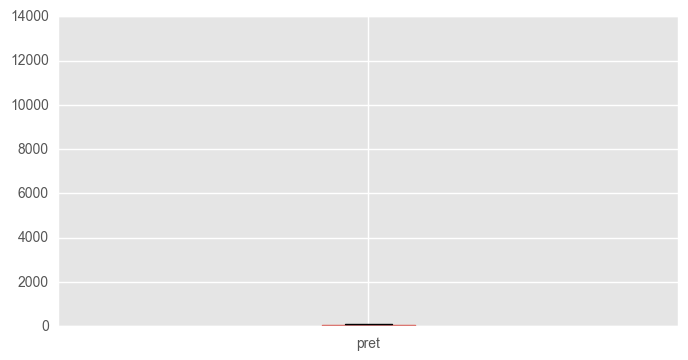

In [341]:
df.pret.plot(kind = 'box', figsize = (8, 4))

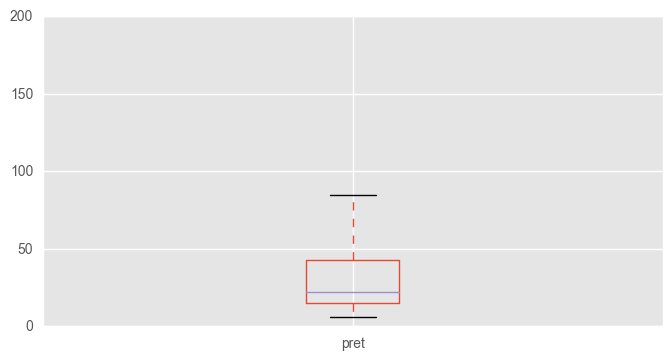

In [342]:
plt.ylim([0,200])

df.pret.plot(kind = 'box', figsize = (8, 4))

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


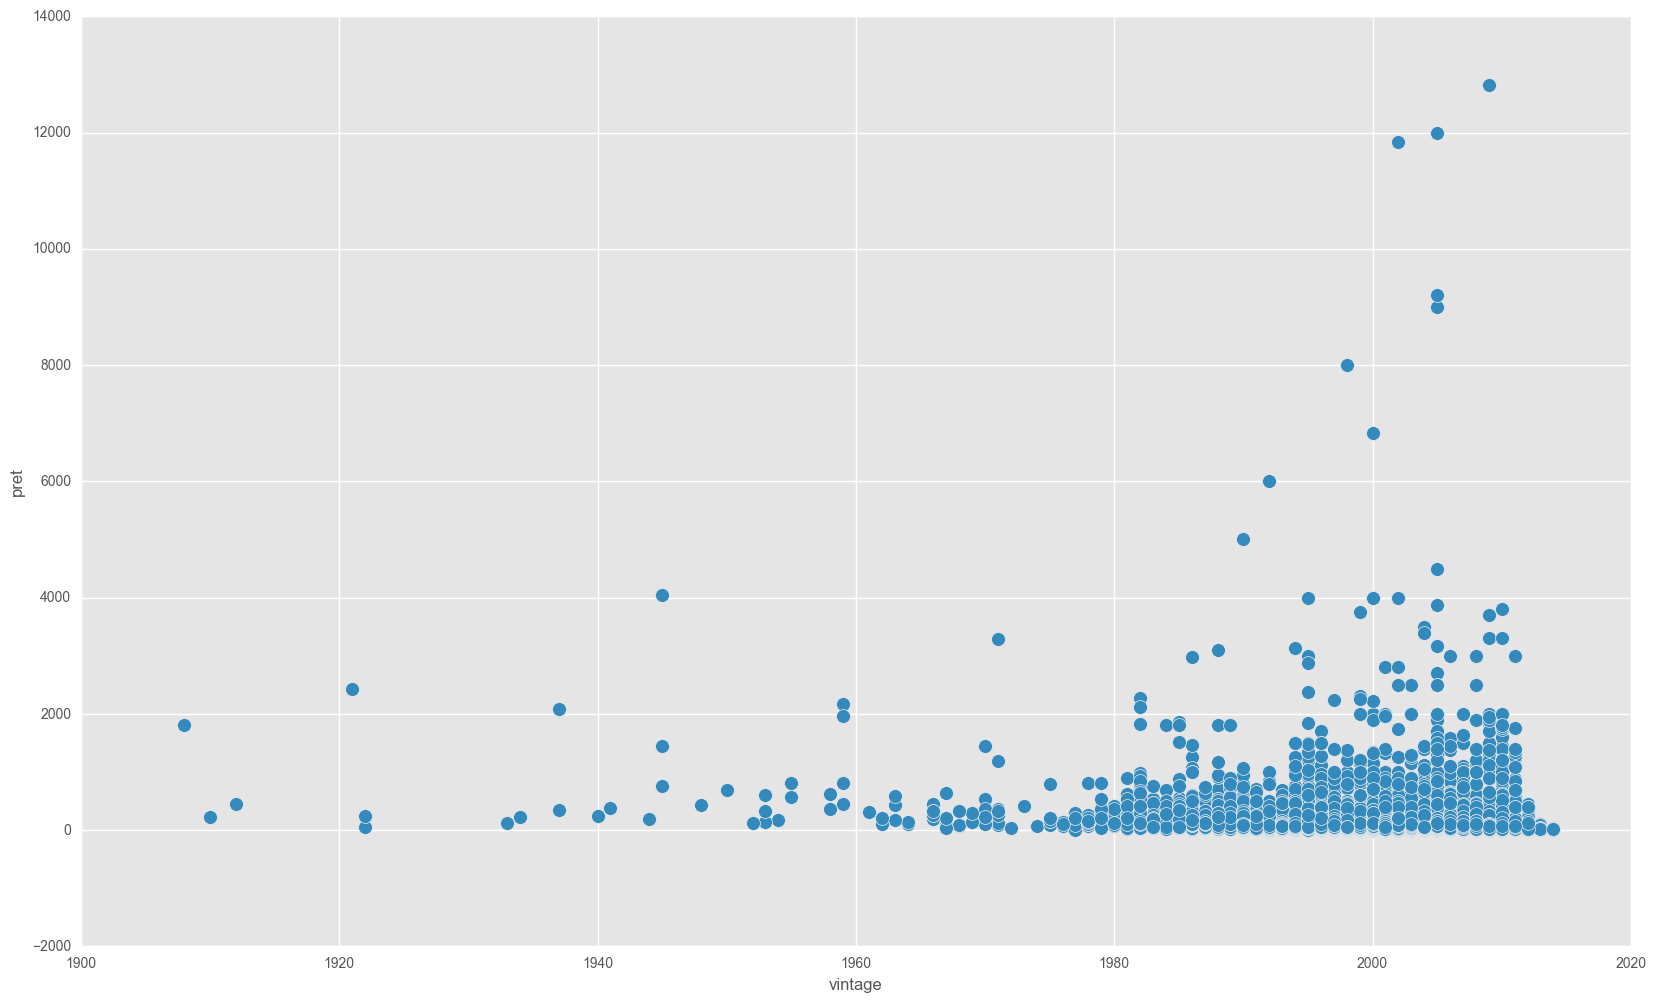

In [343]:
df.vintage = df.vintage.convert_objects(convert_numeric=True)

df.plot(kind = 'scatter', x = 'vintage', y = 'pret', s = 100, figsize = (20, 12))

In [344]:
df.describe()

,id,vintage,pmax,pmin,pret,pr,cr,temp_avg,temp_mam,temp_jja,temp_son,temp_djf,pre_tot,pre_mam,pre_jja,pre_son,pre_djf,cc_avg,cc_mam,cc_jja,cc_son,cc_djf,vp_avg,vp_mam,vp_jja,vp_son,vp_djf
count,72199.000000,72199.000000,72199.000000,72199.00000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000,72199.000000
mean,83491.078893,2003.714387,123.743181,44.43347,49.514638,42.923365,0.878932,11.949767,11.182901,18.782973,12.666434,5.172426,750.449718,180.531737,176.446983,198.503211,194.170939,56.154803,58.341466,48.636862,54.831926,62.859137,10.653711,9.592077,14.698089,10.750188,7.561577
std,36311.526307,5.377414,852.007167,149.42604,159.638422,45.665315,1.759544,3.878384,4.062664,4.151353,4.009817,9.051276,181.327494,50.439772,76.273031,72.554666,62.761425,8.910935,9.343121,10.525606,9.556088,9.970478,1.535630,1.997615,3.113839,1.766380,3.969091
min,6.000000,1908.000000,2.290000,0.00000,5.990000,0.000000,0.000000,-5.400000,-9.200000,3.800000,-2.800000,-21.800000,208.400000,10.500000,0.000000,4.900000,55.900000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000,3.000000,5.300000,5.100000,1.300000
25%,55629.000000,2000.000000,15.990000,12.99000,14.990000,0.000000,0.000000,9.200000,8.400000,18.600000,9.900000,-1.400000,697.700000,167.700000,128.200000,166.900000,153.500000,51.800000,55.100000,40.200000,52.100000,62.600000,9.600000,8.100000,14.800000,9.400000,4.700000
50%,90257.000000,2004.000000,23.990000,19.99000,21.990000,0.000000,0.000000,10.000000,9.900000,19.900000,10.800000,3.200000,738.200000,176.600000,199.200000,184.400000,175.200000,59.600000,61.600000,54.900000,58.000000,64.300000,10.200000,8.700000,15.600000,10.200000,6.700000
75%,113593.500000,2008.000000,46.990000,37.99000,42.990000,91.000000,0.000000,14.200000,12.500000,20.700000,15.100000,7.000000,785.600000,194.400000,214.900000,223.500000,223.900000,61.600000,63.800000,56.300000,59.300000,67.000000,11.400000,10.800000,16.100000,12.200000,8.100000
max,135871.000000,2014.000000,61200.000000,12819.00000,12819.000000,100.000000,5.000000,22.800000,23.400000,27.500000,24.300000,28.200000,1856.600000,534.900000,586.000000,528.500000,736.200000,75.300000,75.800000,69.900000,80.600000,89.600000,15.300000,15.300000,20.900000,16.900000,17.900000


In [345]:
df.corr()

,id,vintage,pmax,pmin,pret,pr,cr,temp_avg,temp_mam,temp_jja,temp_son,temp_djf,pre_tot,pre_mam,pre_jja,pre_son,pre_djf,cc_avg,cc_mam,cc_jja,cc_son,cc_djf,vp_avg,vp_mam,vp_jja,vp_son,vp_djf
id,1.000000,0.805082,-0.037096,0.076618,0.072918,0.289710,0.248832,0.036282,0.049633,0.001408,0.054775,0.015499,-0.049017,-0.009939,-0.036237,-0.054744,0.002762,-0.084288,-0.120772,-0.102987,-0.046929,-0.037892,0.007124,0.027359,-0.036978,0.028267,0.014250
vintage,0.805082,1.000000,-0.081313,-0.077608,-0.079428,0.210070,0.271409,0.040082,0.062575,-0.058623,0.056735,0.044922,-0.037730,-0.006998,0.003484,-0.071659,0.011261,-0.115998,-0.164076,-0.093334,-0.082787,-0.089589,-0.002962,0.041408,-0.085349,-0.007652,0.047344
pmax,-0.037096,-0.081313,1.000000,0.195057,0.202707,0.053295,-0.029345,-0.004656,-0.007461,0.015017,-0.006438,-0.009696,0.011910,0.008230,-0.005551,0.025026,0.003834,0.026430,0.032498,0.009759,0.024348,0.033509,0.004395,-0.002912,0.016366,0.010624,-0.010551
pmin,0.076618,-0.077608,0.195057,1.000000,0.973991,0.139549,-0.058124,-0.030071,-0.034989,0.040688,-0.025528,-0.043830,0.031427,0.027414,0.009784,0.040503,0.008273,0.068125,0.061067,0.024381,0.074704,0.093192,-0.006233,-0.028649,0.048018,0.021840,-0.043621
pret,0.072918,-0.079428,0.202707,0.973991,1.000000,0.149628,-0.050483,-0.025967,-0.031288,0.040013,-0.021404,-0.040006,0.031736,0.028654,0.006749,0.040613,0.010773,0.066604,0.060065,0.021099,0.073580,0.093337,-0.002331,-0.024784,0.046413,0.025913,-0.039929
pr,0.289710,0.210070,0.053295,0.139549,0.149628,1.000000,0.199695,0.096173,0.098963,-0.038266,0.101985,0.092791,-0.032281,-0.019442,-0.065034,-0.044971,0.052855,-0.094193,-0.107282,-0.100871,-0.073314,-0.060513,0.071586,0.088436,-0.069753,0.068870,0.091059
cr,0.248832,0.271409,-0.029345,-0.058124,-0.050483,0.199695,1.000000,0.055041,0.061854,-0.055804,0.059416,0.064691,-0.051147,-0.031849,-0.039199,-0.064824,0.013350,-0.094094,-0.105863,-0.067735,-0.080916,-0.086678,0.018581,0.048515,-0.083064,0.009806,0.064798
temp_avg,0.036282,0.040082,-0.004656,-0.030071,-0.025967,0.096173,0.055041,1.000000,0.985455,-0.146660,0.989910,0.897060,-0.313830,-0.314369,-0.717952,-0.232582,0.506131,-0.803464,-0.693515,-0.824070,-0.784473,-0.604027,0.906834,0.963372,-0.364016,0.731823,0.886666
temp_mam,0.049633,0.062575,-0.007461,-0.034989,-0.031288,0.098963,0.061854,0.985455,1.000000,-0.252079,0.962962,0.925451,-0.304002,-0.309953,-0.654733,-0.267044,0.499072,-0.808939,-0.730497,-0.773922,-0.790687,-0.635881,0.855649,0.968396,-0.464241,0.647001,0.920454
temp_jja,0.001408,-0.058623,0.015017,0.040688,0.040013,-0.038266,-0.055804,-0.146660,-0.252079,1.000000,-0.085225,-0.558273,-0.094727,-0.117540,-0.181313,0.156162,-0.131707,0.349705,0.496424,0.034982,0.291433,0.482421,0.116430,-0.249016,0.934463,0.307473,-0.566190


In [346]:
Q1 = df.pret.quantile(0.25)
Q3 = df.pret.quantile(0.75)

IQR = Q3 - Q1

IQR

28.0

In [347]:
df[df.pret < Q1 - 1.5 * IQR].shape[0]

0

In [348]:
df[df.pret > Q3 + 1.5 * IQR].count()

id          7758
name        7758
vintage     7758
pmax        7758
pmin        7758
pret        7758
app         7758
reg         7758
country2    7758
country     7758
varietal    7758
type        7758
vyard       7758
pr          7758
cr          7758
temp_avg    7758
temp_mam    7758
temp_jja    7758
temp_son    7758
temp_djf    7758
pre_tot     7758
pre_mam     7758
pre_jja     7758
pre_son     7758
pre_djf     7758
cc_avg      7758
cc_mam      7758
cc_jja      7758
cc_son      7758
cc_djf      7758
vp_avg      7758
vp_mam      7758
vp_jja      7758
vp_son      7758
vp_djf      7758
dtype: int64

In [349]:
df.drop(df[df.pret > Q3 + 1.5 * IQR].index, inplace = True)

In [350]:
df.shape[0]

64441

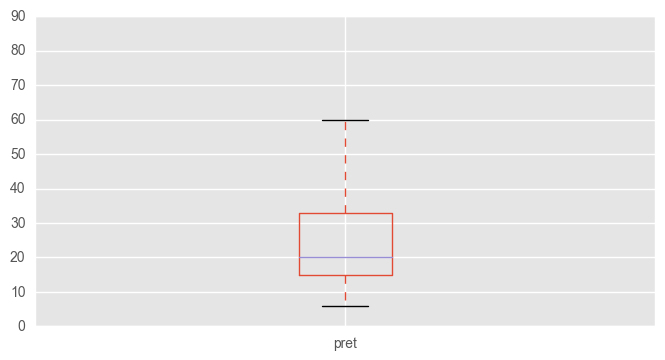

In [351]:
df.pret.plot(kind = 'box', figsize = (8, 4))

In [352]:
df.corr()

,id,vintage,pmax,pmin,pret,pr,cr,temp_avg,temp_mam,temp_jja,temp_son,temp_djf,pre_tot,pre_mam,pre_jja,pre_son,pre_djf,cc_avg,cc_mam,cc_jja,cc_son,cc_djf,vp_avg,vp_mam,vp_jja,vp_son,vp_djf
id,1.000000,0.899389,-0.055177,0.093217,0.130498,0.261999,0.290315,0.050833,0.064778,-0.016503,0.067553,0.036036,-0.048657,-0.008096,-0.047179,-0.058742,0.018610,-0.102308,-0.142468,-0.119302,-0.062224,-0.050266,0.014472,0.041169,-0.058937,0.032788,0.034239
vintage,0.899389,1.000000,-0.086853,-0.070879,-0.035573,0.238405,0.305549,0.043717,0.065312,-0.067003,0.060524,0.051511,-0.023994,0.012323,-0.009277,-0.067719,0.040012,-0.114550,-0.170919,-0.103431,-0.076462,-0.073596,-0.001271,0.043584,-0.097102,0.001756,0.053360
pmax,-0.055177,-0.086853,1.000000,0.099146,0.102324,0.034506,-0.030096,-0.007454,-0.008611,0.011442,-0.010328,-0.010013,-0.000365,0.003421,-0.002272,0.010259,-0.010130,0.016770,0.029399,0.015836,0.009986,0.011052,-0.002428,-0.004044,0.012625,-0.005074,-0.009688
pmin,0.093217,-0.070879,0.099146,1.000000,0.957811,0.271136,-0.112760,-0.088235,-0.099089,0.131419,-0.079035,-0.132083,0.055369,0.029152,0.047411,0.073816,-0.007933,0.146643,0.144671,0.096535,0.135308,0.160156,-0.033933,-0.090047,0.147097,0.006535,-0.126133
pret,0.130498,-0.035573,0.102324,0.957811,1.000000,0.318748,-0.053703,-0.077671,-0.088198,0.129702,-0.067437,-0.123488,0.042146,0.019453,0.038557,0.058994,-0.009537,0.130768,0.129289,0.083911,0.121526,0.145349,-0.028346,-0.081587,0.139698,0.010326,-0.117619
pr,0.261999,0.238405,0.034506,0.271136,0.318748,1.000000,0.237940,0.112389,0.118040,-0.064115,0.115221,0.117913,-0.040868,-0.026571,-0.069534,-0.062190,0.060388,-0.125031,-0.139493,-0.113294,-0.105806,-0.097530,0.075034,0.104979,-0.100240,0.059580,0.116070
cr,0.290315,0.305549,-0.030096,-0.112760,-0.053703,0.237940,1.000000,0.049950,0.056493,-0.050533,0.055380,0.058181,-0.046594,-0.028197,-0.036684,-0.061786,0.015811,-0.087023,-0.102068,-0.065308,-0.072902,-0.076582,0.015205,0.042792,-0.077742,0.010768,0.058435
temp_avg,0.050833,0.043717,-0.007454,-0.088235,-0.077671,0.112389,0.049950,1.000000,0.985743,-0.143012,0.990357,0.894115,-0.317111,-0.318836,-0.714957,-0.242414,0.508133,-0.807418,-0.698190,-0.825321,-0.793484,-0.614143,0.907287,0.963088,-0.364196,0.734210,0.883908
temp_mam,0.064778,0.065312,-0.008611,-0.099089,-0.088198,0.118040,0.056493,0.985743,1.000000,-0.249202,0.963735,0.923936,-0.303651,-0.310589,-0.651660,-0.273754,0.503410,-0.812453,-0.734711,-0.776101,-0.798530,-0.645347,0.857106,0.968958,-0.464562,0.650423,0.919056
temp_jja,-0.016503,-0.067003,0.011442,0.131419,0.129702,-0.064115,-0.050533,-0.143012,-0.249202,1.000000,-0.080691,-0.561559,-0.107970,-0.130942,-0.190161,0.145527,-0.137189,0.352683,0.501655,0.035524,0.292744,0.494131,0.120140,-0.249402,0.935380,0.314299,-0.568712


In [353]:
df.describe()

,id,vintage,pmax,pmin,pret,pr,cr,temp_avg,temp_mam,temp_jja,temp_son,temp_djf,pre_tot,pre_mam,pre_jja,pre_son,pre_djf,cc_avg,cc_mam,cc_jja,cc_son,cc_djf,vp_avg,vp_mam,vp_jja,vp_son,vp_djf
count,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000,64441.000000
mean,81596.831334,2003.880371,88.628236,23.401499,26.203223,38.677022,0.927313,12.007185,11.255645,18.676411,12.713817,5.387244,748.241230,180.037620,176.253152,197.263641,194.048570,55.862937,58.060697,48.507256,54.502481,62.432872,10.658052,9.624464,14.609716,10.728951,7.655862
std,35961.814167,4.919392,507.207346,15.499570,16.640391,44.852710,1.789815,3.962038,4.153699,4.306814,4.096499,9.265071,187.859605,51.533366,78.708560,73.836194,63.723985,9.072769,9.504057,10.718359,9.682841,10.042294,1.560433,2.037742,3.211293,1.781272,4.068046
min,6.000000,1922.000000,2.290000,0.000000,5.990000,0.000000,0.000000,-5.400000,-9.200000,3.800000,-2.800000,-21.800000,208.400000,10.500000,0.000000,4.900000,55.900000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000,3.000000,5.300000,5.100000,1.300000
25%,54713.000000,2000.000000,15.990000,12.950000,14.790000,0.000000,0.000000,9.200000,8.400000,18.500000,9.900000,-1.400000,697.700000,167.700000,117.900000,163.700000,153.500000,50.700000,54.900000,39.700000,50.900000,62.300000,9.600000,8.100000,14.700000,9.300000,4.700000
50%,87808.000000,2003.000000,21.990000,17.990000,19.990000,0.000000,0.000000,10.000000,9.900000,19.900000,10.700000,3.400000,734.400000,176.600000,199.200000,183.300000,174.600000,59.600000,61.600000,55.200000,57.900000,64.100000,10.200000,8.700000,15.600000,10.200000,6.700000
75%,110908.000000,2008.000000,34.990000,28.990000,32.990000,90.000000,0.000000,14.300000,12.700000,20.700000,15.300000,7.200000,785.100000,193.000000,214.900000,222.900000,223.900000,61.600000,63.800000,56.300000,58.700000,66.900000,11.800000,10.900000,16.100000,12.200000,8.200000
max,135871.000000,2014.000000,14130.000000,85.990000,84.990000,100.000000,5.000000,22.800000,23.400000,27.500000,24.300000,28.200000,1856.600000,534.900000,586.000000,528.500000,736.200000,75.300000,75.800000,69.900000,80.600000,89.600000,15.300000,15.300000,20.900000,16.900000,17.900000


In [354]:
df.pr.unique()

array([  0,  92,  90,  87,  85,  88,  89,  91,  86,  93,  95,  94,  97,
        96,  98, 100,  84,  99], dtype=int64)

In [355]:
(df.pr == 0).sum()

36941

In [356]:
df.drop(df[df.pr == 0].index, inplace = True)

In [357]:
df.shape

(27500, 35)

In [358]:
df.corr()

,id,vintage,pmax,pmin,pret,pr,cr,temp_avg,temp_mam,temp_jja,temp_son,temp_djf,pre_tot,pre_mam,pre_jja,pre_son,pre_djf,cc_avg,cc_mam,cc_jja,cc_son,cc_djf,vp_avg,vp_mam,vp_jja,vp_son,vp_djf
id,1.000000,0.876070,-0.107218,0.097538,0.108492,0.309732,0.222748,0.052268,0.058842,0.011805,0.067045,0.026429,-0.034757,-0.024031,-0.070379,-0.017814,0.037271,-0.078659,-0.119172,-0.128793,-0.044729,-0.003402,0.039506,0.039282,-0.024042,0.085822,0.022744
vintage,0.876070,1.000000,-0.141017,-0.099829,-0.092354,0.166024,0.245516,0.044337,0.062861,-0.061357,0.058077,0.049625,0.000036,0.004940,-0.021648,-0.032845,0.074421,-0.094416,-0.160161,-0.103654,-0.062648,-0.033357,0.015020,0.044506,-0.085518,0.035712,0.051705
pmax,-0.107218,-0.141017,1.000000,0.102459,0.101412,0.016462,-0.052767,-0.004742,-0.007327,0.021224,-0.008479,-0.010930,0.009390,0.011894,-0.002368,0.029804,-0.010961,0.030057,0.050700,0.021450,0.019515,0.025865,0.007649,-0.000335,0.026817,0.007553,-0.012486
pmin,0.097538,-0.099829,0.102459,1.000000,0.947816,0.567996,-0.222941,-0.139765,-0.154125,0.191399,-0.125357,-0.201719,0.058069,0.028822,0.072230,0.099829,-0.057695,0.218126,0.228777,0.148062,0.197926,0.222965,-0.059819,-0.139809,0.224802,0.002533,-0.194692
pret,0.108492,-0.092354,0.101412,0.947816,1.000000,0.585954,-0.171106,-0.126725,-0.142411,0.193070,-0.111667,-0.191859,0.044874,0.018490,0.060027,0.087370,-0.057716,0.202570,0.217139,0.133397,0.183857,0.209311,-0.048750,-0.129131,0.221640,0.013052,-0.185198
pr,0.309732,0.166024,0.016462,0.567996,0.585954,1.000000,0.069507,0.023318,0.017634,0.106820,0.034099,-0.032672,-0.040926,-0.044793,-0.037154,-0.024075,-0.010751,0.031524,0.037411,0.001815,0.017276,0.056565,0.037872,0.004662,0.079165,0.060179,-0.031463
cr,0.222748,0.245516,-0.052767,-0.222941,-0.171106,0.069507,1.000000,0.069802,0.075260,-0.065531,0.069932,0.082130,-0.063761,-0.044040,-0.058155,-0.072646,0.019827,-0.110722,-0.118062,-0.079850,-0.100450,-0.100451,0.029148,0.061851,-0.097488,0.015555,0.081198
temp_avg,0.052268,0.044337,-0.004742,-0.139765,-0.126725,0.023318,0.069802,1.000000,0.987089,-0.157153,0.990859,0.894551,-0.365316,-0.361307,-0.712172,-0.327872,0.489891,-0.834897,-0.740643,-0.819009,-0.818147,-0.658186,0.905436,0.962714,-0.396086,0.717303,0.888251
temp_mam,0.058842,0.062861,-0.007327,-0.154125,-0.142411,0.017634,0.075260,0.987089,1.000000,-0.261961,0.967076,0.925562,-0.346680,-0.353071,-0.646608,-0.353516,0.489890,-0.838466,-0.774536,-0.767794,-0.822430,-0.686560,0.859889,0.969672,-0.491835,0.636097,0.924376
temp_jja,0.011805,-0.061357,0.021224,0.191399,0.193070,0.106820,-0.065531,-0.157153,-0.261961,1.000000,-0.093851,-0.573469,-0.110377,-0.125980,-0.201208,0.158469,-0.143559,0.370812,0.515414,0.032369,0.319448,0.515413,0.101415,-0.263806,0.930126,0.324494,-0.575180


In [359]:
cols2 = ['country'
        ]

df2 = df[['country', 'pr']]

df2 = pd.get_dummies(df2, columns = cols2)

In [360]:
df2_corr = df2.corr().pr

df2_corr.abs().sort_values()

country_Austria          0.001782
country_United States    0.001949
country_Lebanon          0.006046
country_Canada           0.006131
country_Greece           0.008550
country_Spain            0.008577
country_Slovenia         0.009208
country_Italy            0.009729
country_Hungary          0.013408
country_Israel           0.014438
country_Germany          0.030563
country_Australia        0.039863
country_Argentina        0.048560
country_New Zealand      0.059313
country_France           0.059927
country_Portugal         0.063083
country_South Africa     0.072793
country_Chile            0.076586
pr                       1.000000
Name: pr, dtype: float64

In [361]:
cols3 = ['app'
        ]

df3 = df[['app', 'pr']]

df3 = pd.get_dummies(df3, columns = cols3)

df3_corr = df3.corr().pr

df3_corr.abs().sort_values().tail(20)

app_Other New Zealand       0.040806
app_Piedmont                0.041906
app_Margaret River          0.042274
app_Southern Italy          0.044319
app_Argentina               0.048560
app_Marlborough             0.048986
app_Cotes du Rhone          0.049012
app_Other Australia         0.057834
app_McLaren Vale            0.059631
app_Walla Walla Valley      0.060415
app_Champagne               0.061198
app_Portugal                0.063083
app_Barossa Valley          0.068826
app_Napa Valley             0.070793
app_South Africa            0.072793
app_Chile                   0.076586
app_Chateauneuf-du-Pape     0.091170
app_Other California        0.094923
app_Sauternes and Barsac    0.096085
pr                          1.000000
Name: pr, dtype: float64

In [362]:
cols4 = ['varietal']

df4 = df[['varietal', 'pr']]

df4 = pd.get_dummies(df4, columns = cols4)

df4_corr = df4.corr().pr

df4_corr.abs().sort_values().tail(20)

varietal_Malbec                 0.029715
varietal_Pinotage               0.031782
varietal_Gewurztraminer         0.032053
varietal_Other White Wine       0.032183
varietal_Rose                   0.036722
varietal_Barbera                0.038218
varietal_Vintage                0.038534
varietal_Pinot Blanc            0.044771
varietal_Rhone Red Blends       0.051632
varietal_Other White Blends     0.063508
varietal_Port                   0.070169
varietal_Chardonnay             0.071790
varietal_Pinot Gris/Grigio      0.072688
varietal_Bordeaux Red Blends    0.075087
varietal_Merlot                 0.085994
varietal_Nebbiolo               0.089325
varietal_Syrah/Shiraz           0.093316
varietal_Other Dessert          0.094815
varietal_Sauvignon Blanc        0.107643
pr                              1.000000
Name: pr, dtype: float64

In [363]:
cols5 = ['type']

df5 = df[['type', 'pr']]

df5 = pd.get_dummies(df5, columns = cols5)

df5_corr = df5.corr().pr

df5_corr.abs().sort_values().tail(20)

type_Champagne & Sparkling               0.042246
type_Rose Wine                           0.051899
type_Dessert, Fortified & Fruit Wines    0.116945
type_Red Wines                           0.131335
type_White Wines                         0.166445
pr                                       1.000000
Name: pr, dtype: float64

In [364]:
cols = ['country', 'app', 'type', 'varietal'
        ]

df = pd.get_dummies(df, columns = cols)

In [365]:
df.columns

Index([u'id', u'name', u'vintage', u'pmax', u'pmin', u'pret', u'reg',
       u'country2', u'vyard', u'pr',
       ...
       u'varietal_Sangiovese', u'varietal_Sauvignon Blanc',
       u'varietal_Semillon', u'varietal_Sherry', u'varietal_Syrah/Shiraz',
       u'varietal_Tempranillo', u'varietal_Torrontes', u'varietal_Vintage',
       u'varietal_Viognier', u'varietal_Zinfandel'],
      dtype='object', length=206)

In [366]:
df.shape

(27500, 206)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


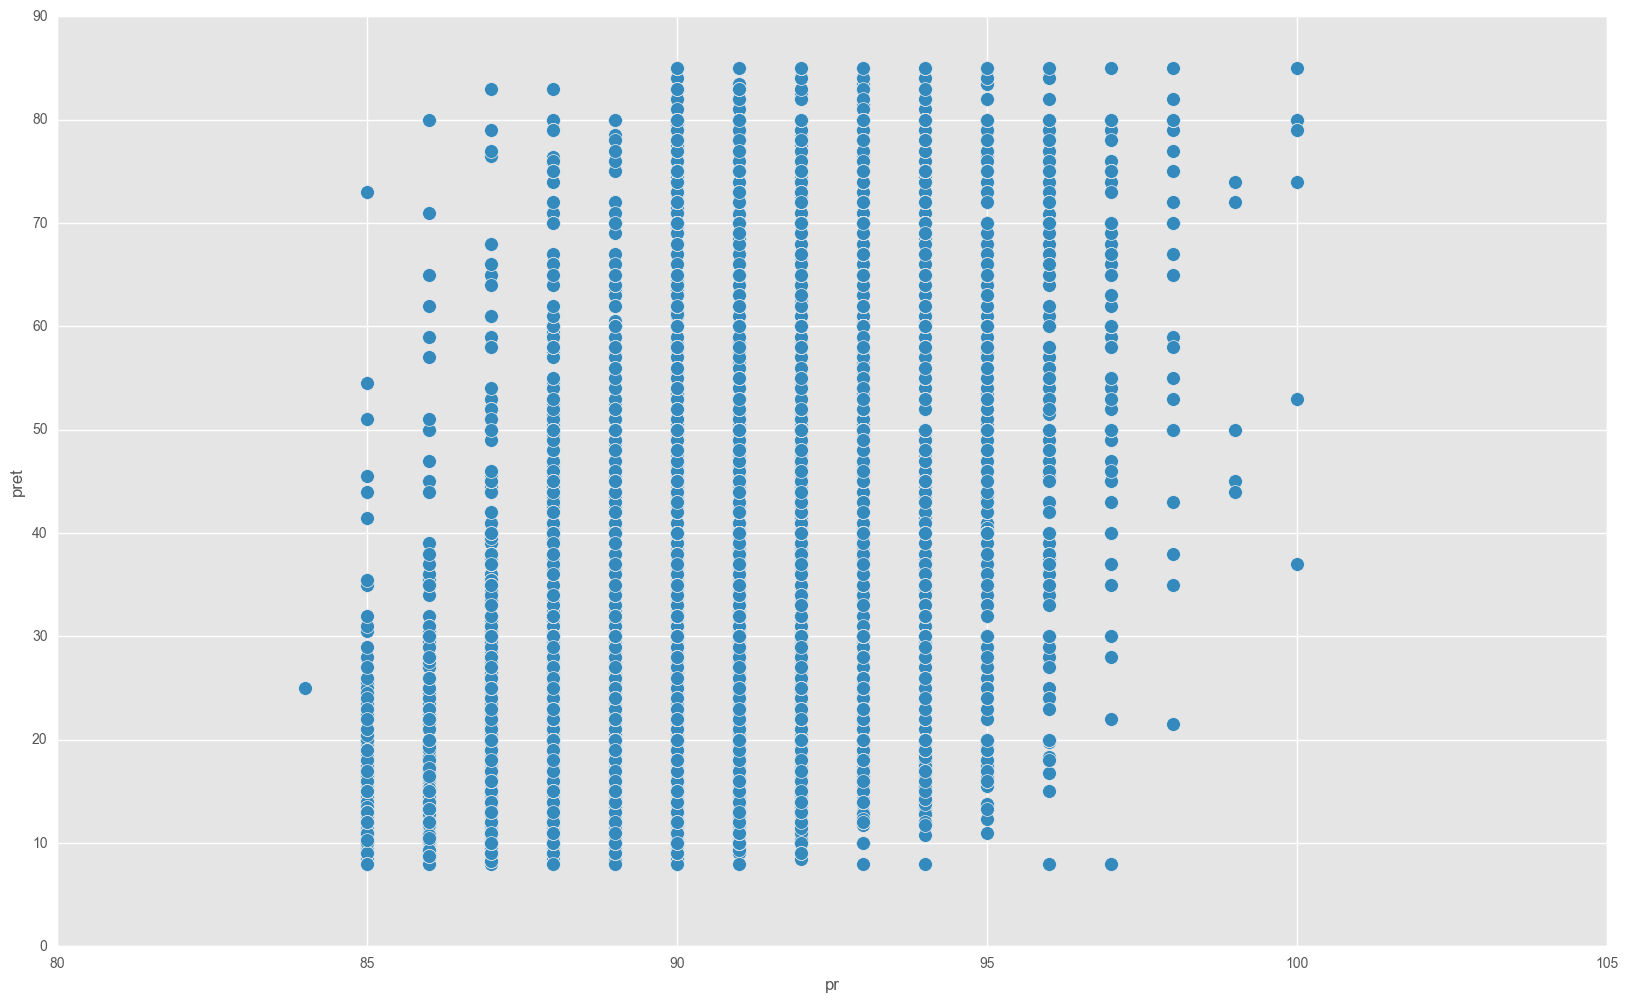

In [367]:
df.vintage = df.vintage.convert_objects(convert_numeric=True)

df.plot(kind = 'scatter', x = 'pr', y = 'pret', s = 100, figsize = (20, 12))

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


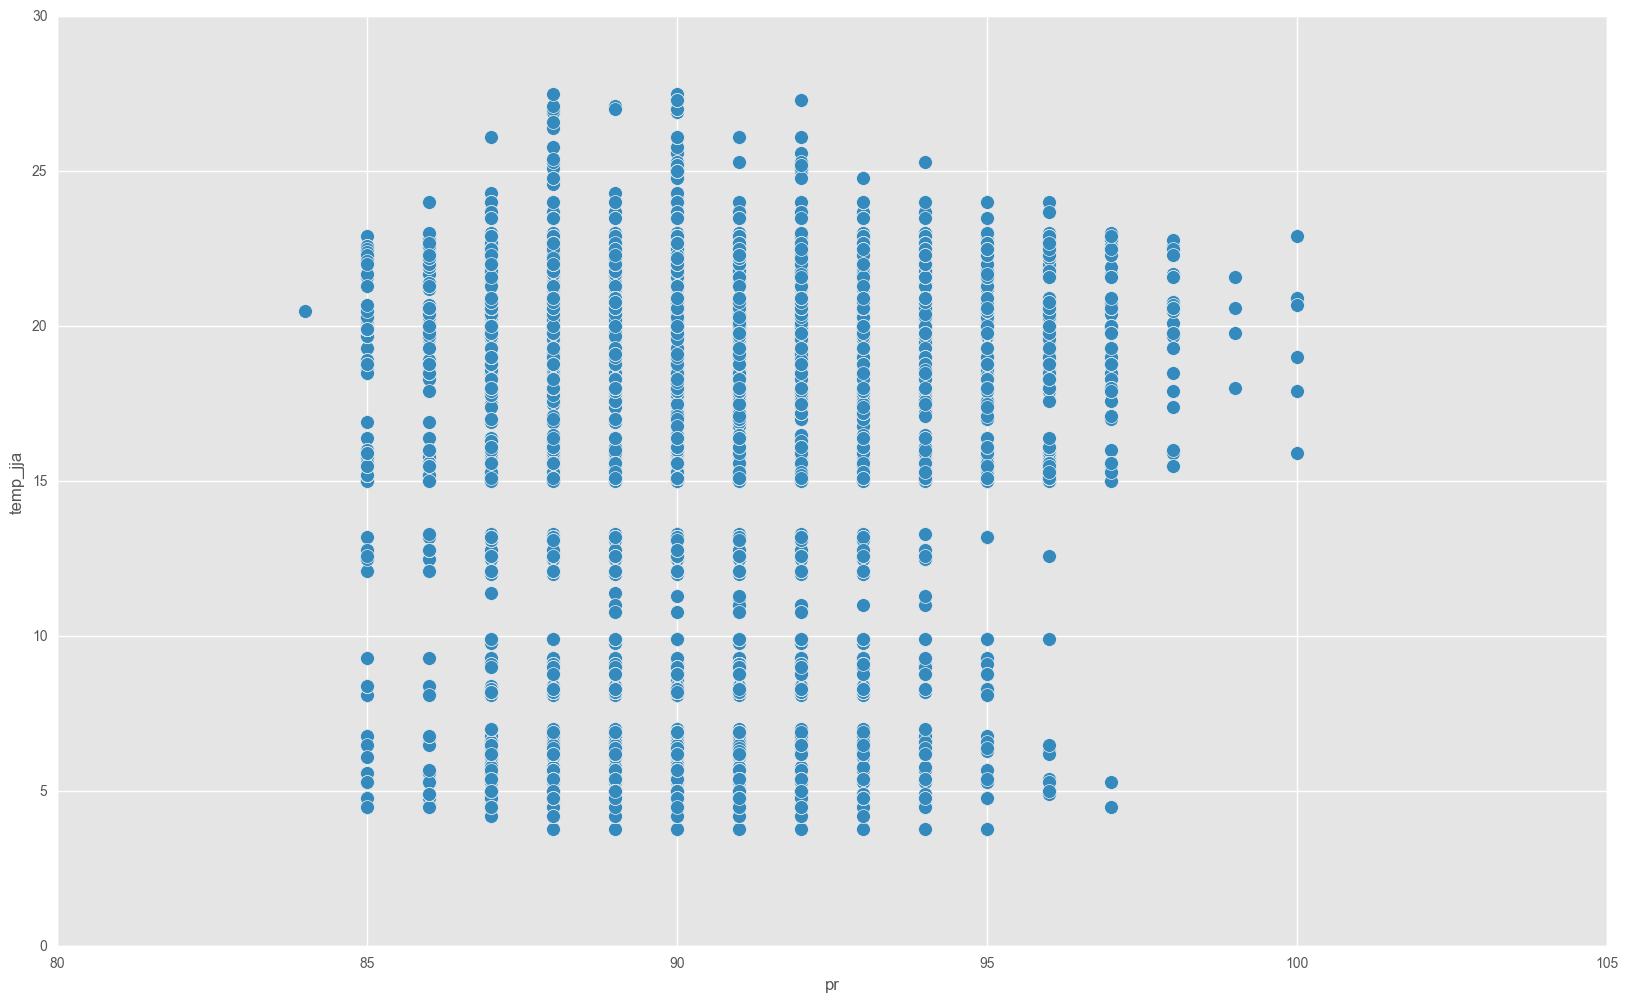

In [368]:
df.vintage = df.vintage.convert_objects(convert_numeric=True)

df.plot(kind = 'scatter', x = 'pr', y = 'temp_jja', s = 100, figsize = (20, 12))

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


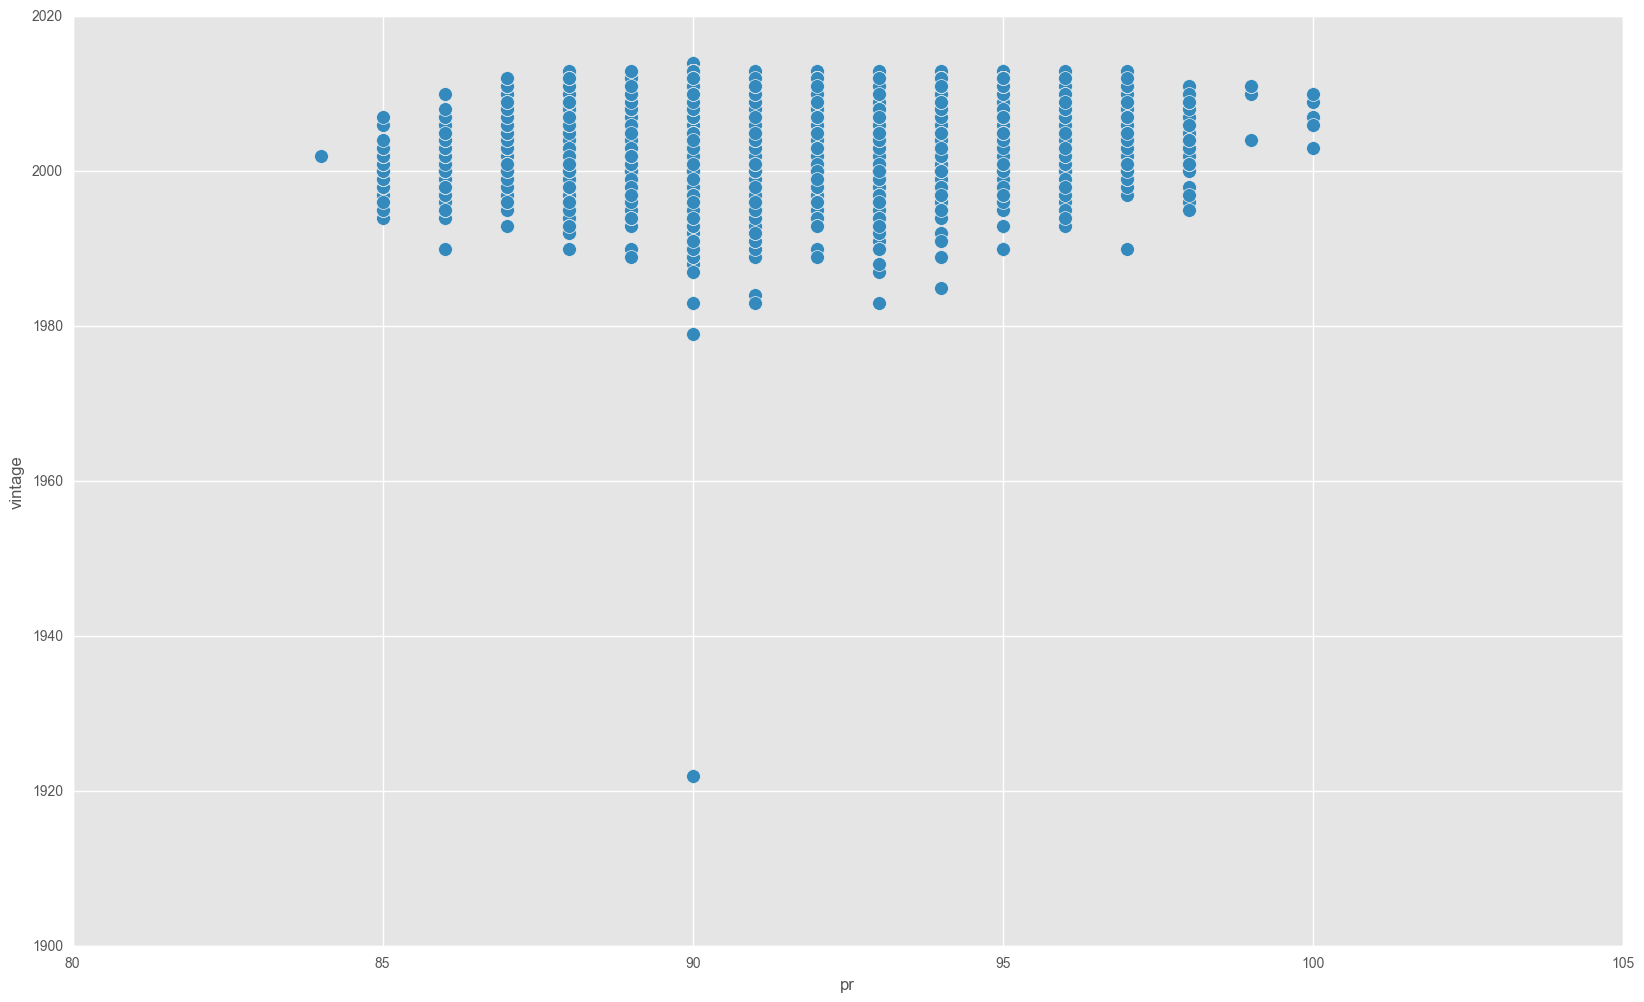

In [369]:
df.vintage = df.vintage.convert_objects(convert_numeric=True)

df.plot(kind = 'scatter', x = 'pr', y = 'vintage', s = 100, figsize = (20, 12))

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


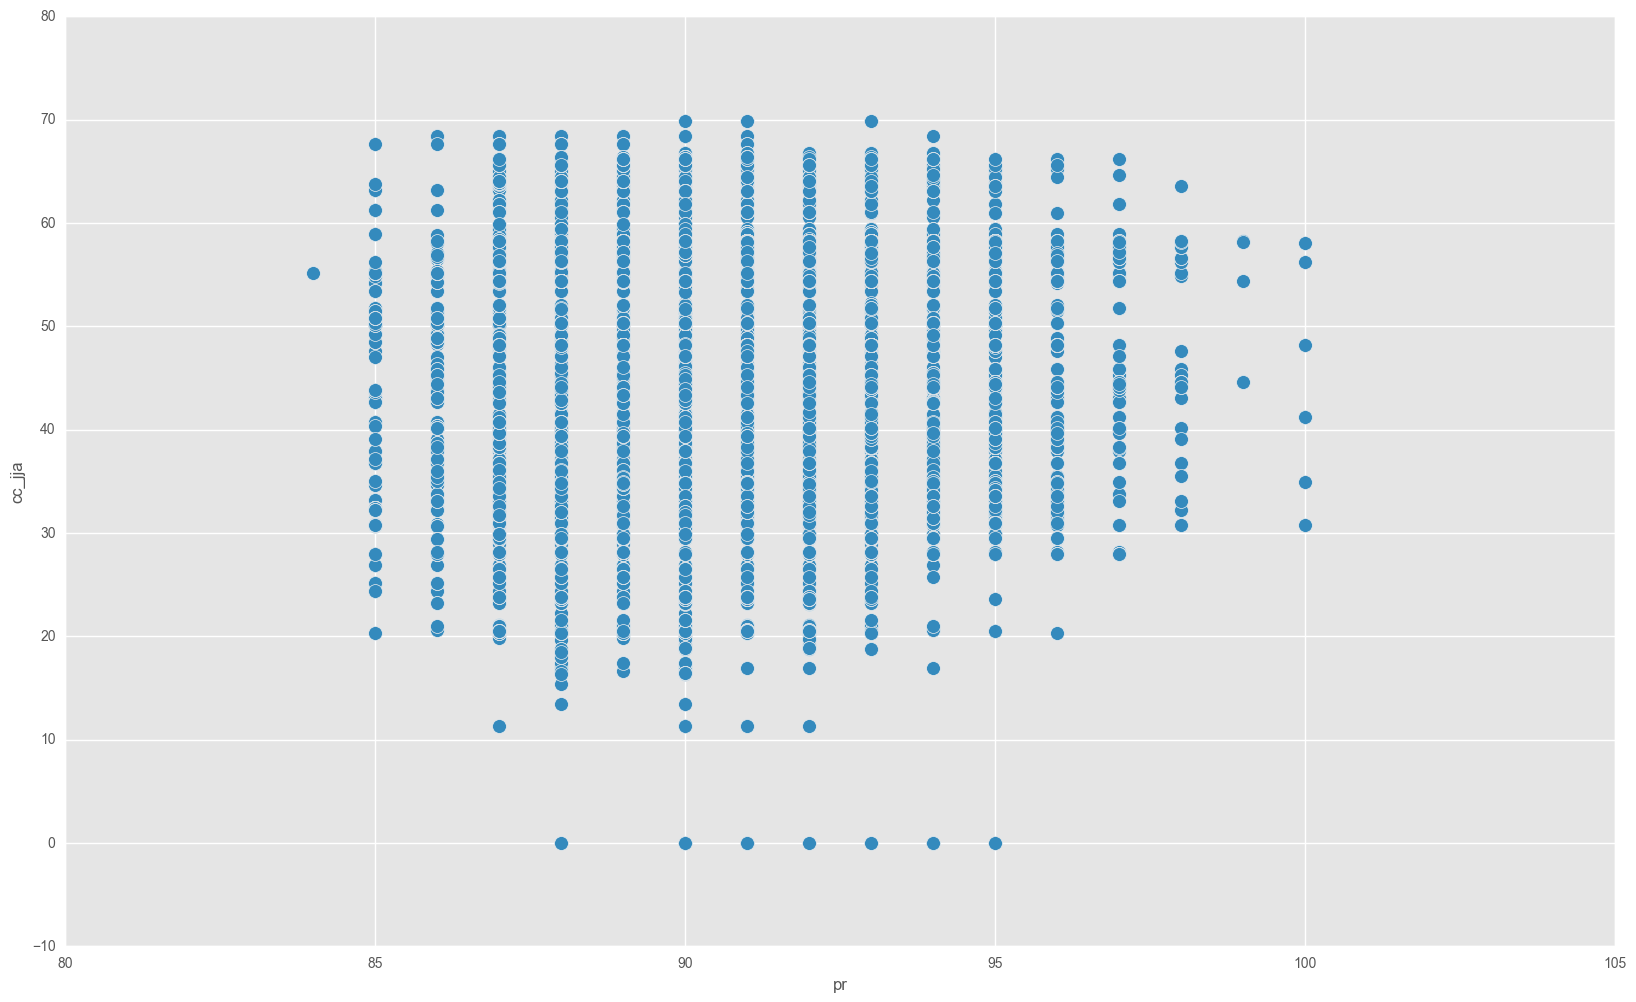

In [370]:
df.vintage = df.vintage.convert_objects(convert_numeric=True)

df.plot(kind = 'scatter', x = 'pr', y = 'cc_jja', s = 100, figsize = (20, 12))

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


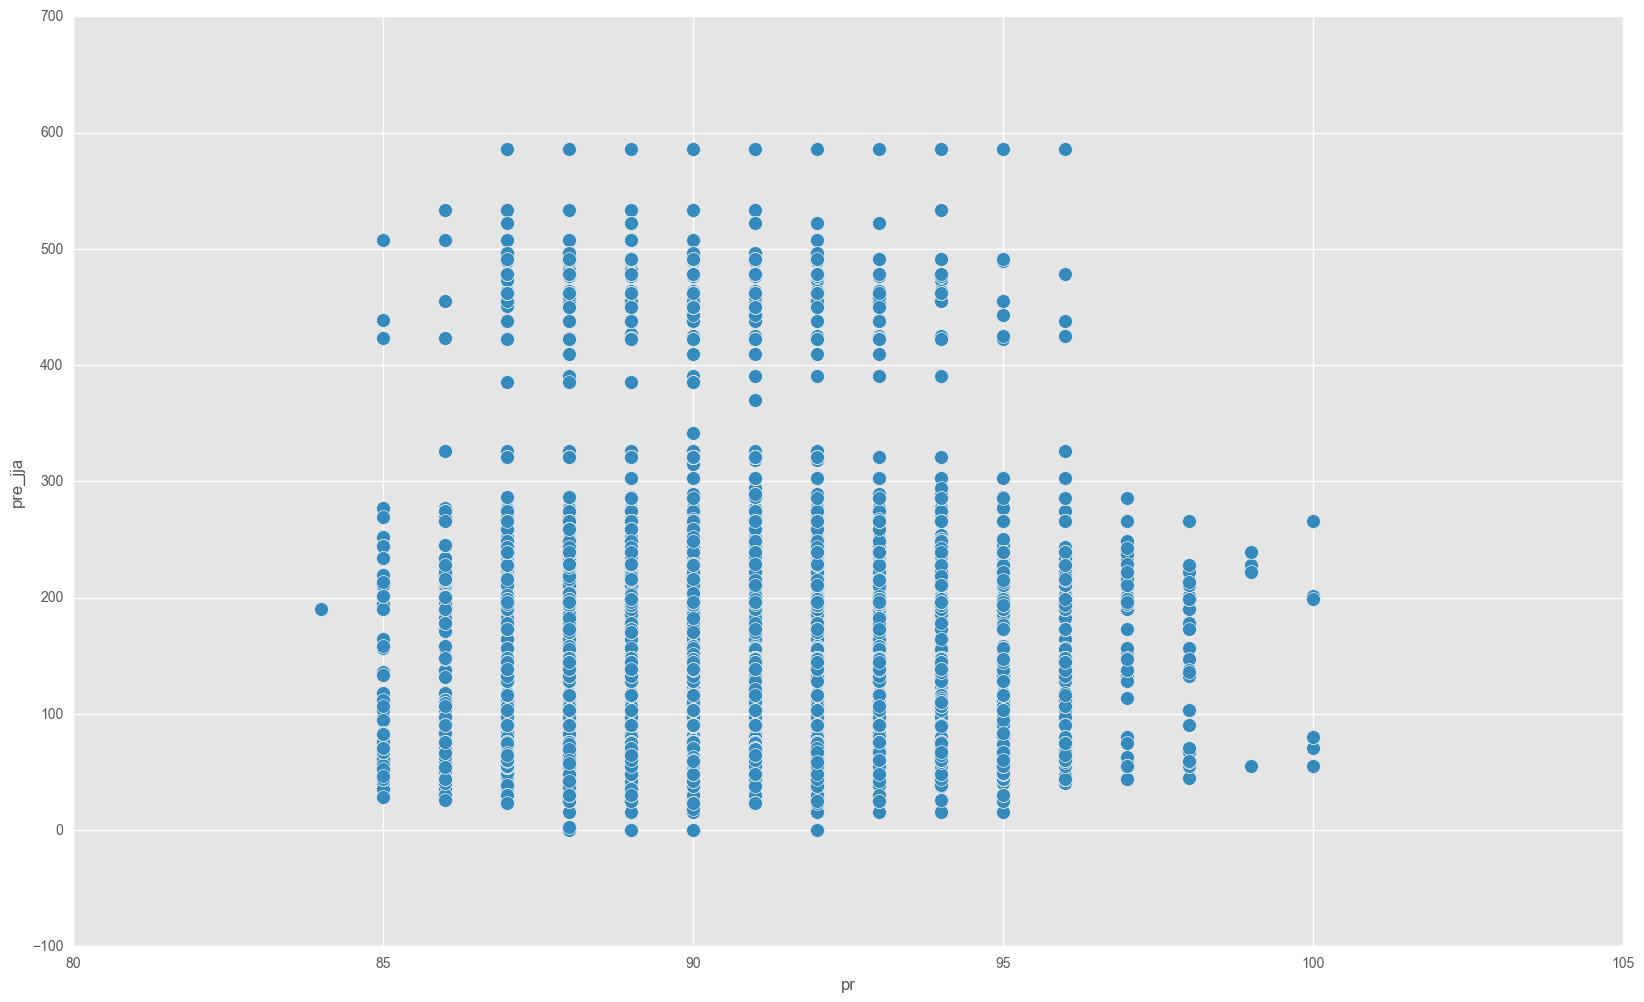

In [373]:
df.vintage = df.vintage.convert_objects(convert_numeric=True)

df.plot(kind = 'scatter', x = 'pr', y = 'pre_jja', s = 100, figsize = (20, 12))

In [296]:
df_corr = df.corr().pr

df_corr.abs().sort_values().tail(25)

varietal_Chardonnay                      0.071790
varietal_Pinot Gris/Grigio               0.072688
country_South Africa                     0.072793
app_South Africa                         0.072793
varietal_Bordeaux Red Blends             0.075087
app_Chile                                0.076586
country_Chile                            0.076586
vp_jja                                   0.079165
varietal_Merlot                          0.085994
varietal_Nebbiolo                        0.089325
app_Chateauneuf-du-Pape                  0.091170
varietal_Syrah/Shiraz                    0.093316
varietal_Other Dessert                   0.094815
app_Other California                     0.094923
app_Sauternes and Barsac                 0.096085
temp_jja                                 0.106820
varietal_Sauvignon Blanc                 0.107643
type_Dessert, Fortified & Fruit Wines    0.116945
type_Red Wines                           0.131335
vintage                                  0.166024


In [297]:
train_df = df.sample(frac = .6, random_state = 0)
test_df = df.drop(train_df.index)

In [298]:
names_X = ['pret', 'type_White Wines', 'vintage', 'temp_jja', 'app_Sauternes and Barsac', 'varietal_Other Dessert']
    
def X_c(df):
    X = df[ names_X ]
    c = df.pr
    return X, c

train_X1, train_c = X_c(df)
test_X, test_c = X_c(test_df)

In [299]:
from sklearn import linear_model, cross_validation

model = linear_model.LogisticRegression().\
    fit(train_X1, train_c)

print model.intercept_
print model.coef_

[  1.36934393e-03   2.74496542e-04   3.41891175e-04   4.44966311e-03
   2.22214135e-05   7.71878360e-06  -2.37348188e-05  -2.55283240e-05
  -1.12774619e-05  -3.37153109e-05  -4.31829273e-05  -3.65157093e-06
  -1.25493884e-03  -1.07599221e-02  -1.86409590e-04  -1.04794967e-02
  -1.74729654e-03]
[[ -3.25153920e-02  -2.43571667e-01  -6.24011257e-03   1.68176029e-01
   -1.71837415e-03  -6.45577705e-03]
 [ -1.71310553e-01   5.61942679e-03  -3.62957411e-04  -1.72164289e-02
   -1.06686959e-04  -2.05228987e-04]
 [ -1.29685114e-01  -1.13325666e-03  -8.16175145e-04   2.71952738e-02
   -1.47606640e-04  -4.68273249e-04]
 [ -9.90264365e-02   1.17462461e-01  -4.60435560e-04   1.55208542e-02
   -1.51811886e-03  -5.38136292e-03]
 [ -6.37805049e-02   1.66952589e-03  -3.53818195e-04   9.01230253e-03
   -1.17257560e-04  -3.20733973e-04]
 [ -3.57393230e-02  -5.58762915e-04  -4.90667508e-04  -1.75270444e-02
   -1.26372959e-04  -2.05788147e-04]
 [ -2.83035220e-02  -8.96034920e-04  -2.59345612e-04   1.098548

In [300]:
model.score(train_X1, train_c)

0.25923636363636365

In [313]:
model = smf.ols(formula = 'pr ~ pret + vintage + temp_jja + vp_jja', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     4658.
Date:                Tue, 21 Feb 2017   Prob (F-statistic):               0.00
Time:                        21:37:21   Log-Likelihood:                -54840.
No. Observations:               27500   AIC:                         1.097e+05
Df Residuals:                   27495   BIC:                         1.097e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -131.4464      4.811    -27.322      0.000      -140.876  -122.017
pret           0.0767      0.001    129.021      0.000         0.076     0.078
vintage        0.1097      0.002     45.760      0.000         0.105     0.114
temp_jja       0.1377      0.006     21.816      0.000         0.125     0.150
vp_jja        -0.2002      0.009    -23.227      0.000        -0.217    -0.183
==============================================================================
Omnibus:                      132.361   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.033
Skew:                           0.141   Prob(JB):                     1.44e-31
Kurtosis:                       3.211   Cond. No.                     9.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [314]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [315]:
df.columns

Index([u'id', u'name', u'vintage', u'pmax', u'pmin', u'pret', u'reg',
       u'country2', u'vyard', u'pr',
       ...
       u'varietal_Sangiovese', u'varietal_Sauvignon_Blanc',
       u'varietal_Semillon', u'varietal_Sherry', u'varietal_Syrah/Shiraz',
       u'varietal_Tempranillo', u'varietal_Torrontes', u'varietal_Vintage',
       u'varietal_Viognier', u'varietal_Zinfandel'],
      dtype='object', length=206)

In [316]:
model = smf.ols(formula = 'pr ~ pret + vintage + temp_jja + vp_jja + type_White_Wines + app_Sauternes_and_Barsac + varietal_Other_Dessert', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     2731.
Date:                Tue, 21 Feb 2017   Prob (F-statistic):               0.00
Time:                        21:40:24   Log-Likelihood:                -54695.
No. Observations:               27500   AIC:                         1.094e+05
Df Residuals:                   27492   BIC:                         1.095e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                 -133.3472      4.797    -27.800      0.000      -142.749  -123.946
pret                         0.0756      0.001    123.597      0.000         0.074     0.077
vintage                      0.1107      0.002     46.296      0.000         0.106     0.115
temp_jja                     0.1375      0.006     21.765      0.000         0.125     0.150
vp_jja                      -0.1997      0.009    -23.142      0.000        -0.217    -0.183
type_White_Wines            -0.0868      0.025     -3.500      0.000        -0.135    -0.038
app_Sauternes_and_Barsac     1.5647      0.226      6.935      0.000         1.122     2.007
varietal_Other_Dessert       1.0742      0.137      7.837      0.000         0.806     1.343
==============================================================================
Omnibus:                       90.530   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.922
Skew:                           0.115   Prob(JB):                     1.48e-21
Kurtosis:                       3.174   Cond. No.                     9.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


AttributeError: 'DataFrame' object has no attribute 'RetailPrice'

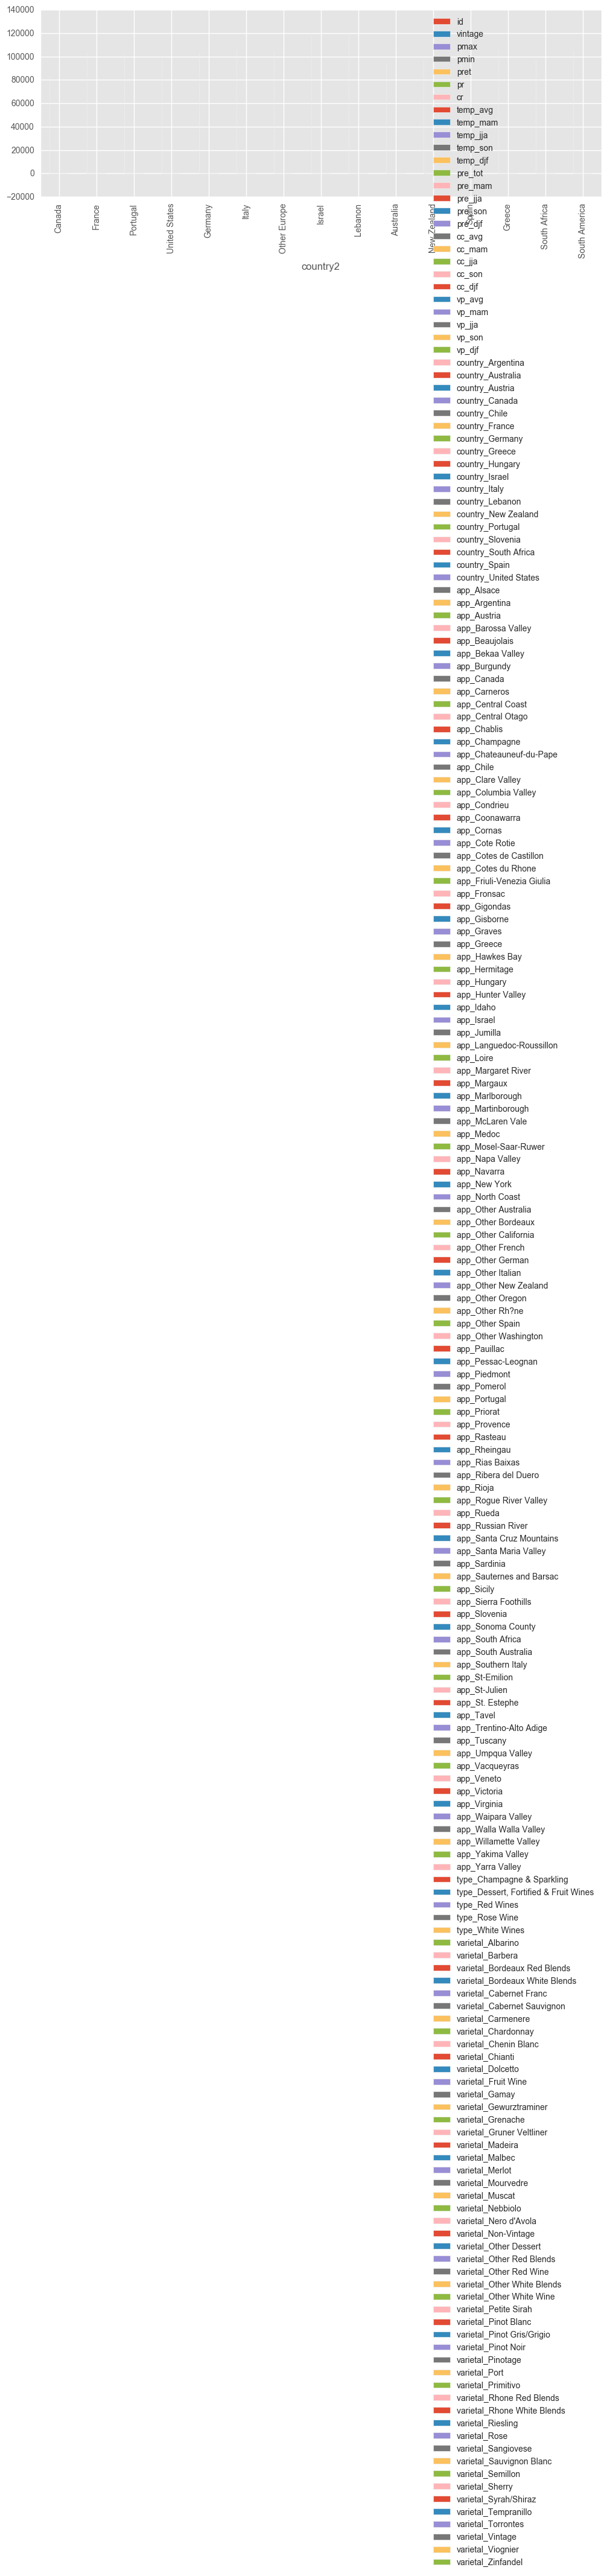

In [376]:
wines_by_region_df = df.groupby(['country2'])

plt.figure() 
wines_by_region_df.median().sort(['pret'],ascending=False).plot(figsize=(12,4), kind='bar')
plt.axhline(df.RetailPrice.median(), color='g')